# World Happiness Report

### Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012,
the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries
by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March
20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness
indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis,
national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess
the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness
explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### The following columns are:-

 GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

##### import all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

###### Load and Read the Dystopia country Dataset

In [2]:
df=pd.read_csv('happy.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


###### To see all column names

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### About the Columns:

1.Country

This column shows that country name.

2.Region

This column shows that Country Region .

3.Happiness Rank

This column shows the Ranking based on Dystopia Residual and indirect corelation with Dystopia Residual.

4.Happiness Score

This happiness score direct impact on Dystopia Residual and good correlation with the Dystopia Residual.

5.Standard Error

If standard error is low those are very happay.

6.Economy (GDP per Capita)

In this Dataset those who have High Economy (GDP per Capita ) there are happy.

7.Health (Life Expectancy)

If Health is high they are very happy in dataset.

8.Freedom

Those who give more freedom they are happy here.

9.Trust (Government Corruption)

There is low corruption in government means they are happy here.

10.Generosity

This column generosity is low means they are happy here

11.Dystopia Residual

This is the target column

###### check some basic information like number of rows and columns ,null values and Dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

###### To check the null values and count that 

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

###### check null values using heatmap

<AxesSubplot:>

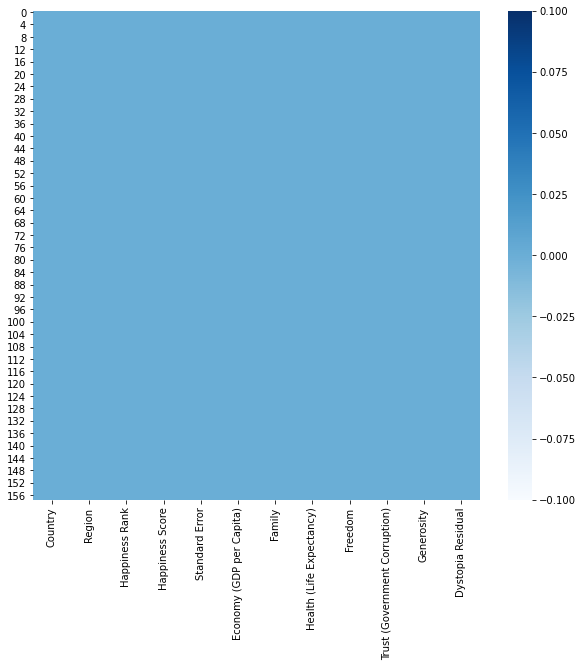

In [7]:
plt.figure(figsize=(10,9))
sns.heatmap(df.isnull(),cmap='Blues')

###### The Country and Region are the object columns so we can change object into integer

In [9]:
list1=['Country', 'Region']

In [10]:
label=LabelEncoder()

In [11]:
for val in list1:
    df[val]=label.fit_transform(df[val])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

###### Describe the dataset

In this we can observe the all columns count,mean,std,min,max,25%,50%,75%.

In [13]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


###### check correlation b/w all columns

In [14]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


###### checking correlation b/w all columns using heatmap

<AxesSubplot:>

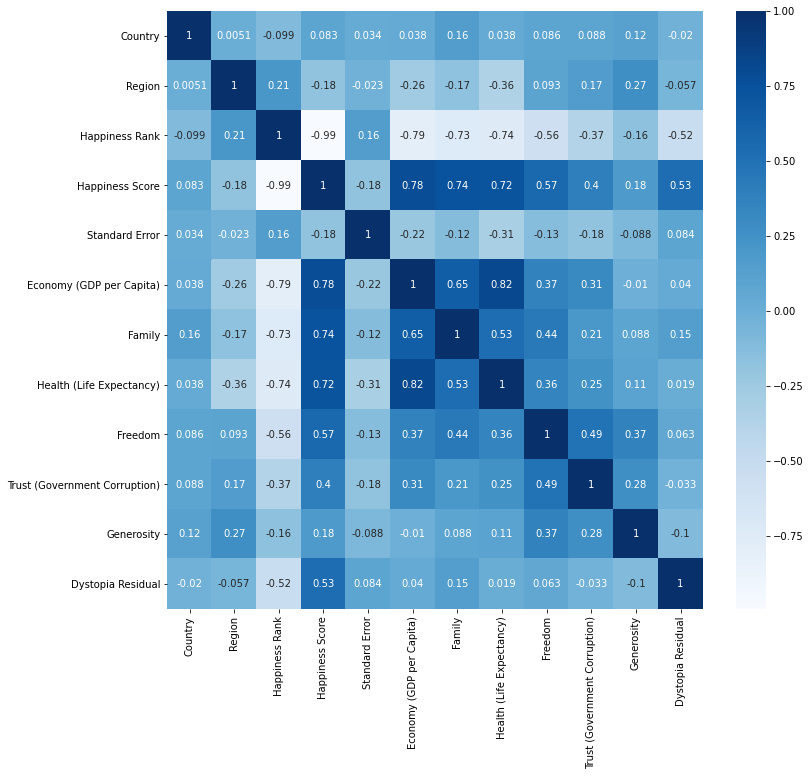

In [15]:
plt.figure(figsize=(12,11))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## EDA using Scatter Plot

In [16]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='Dystopia Residual'>

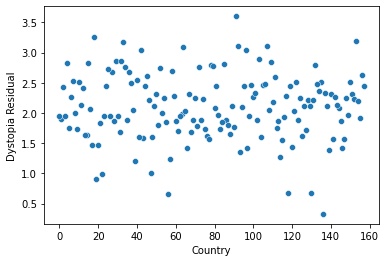

In [17]:
sns.scatterplot(x='Country',y='Dystopia Residual',data=df)

we observe the above scatter plot Dystopia Residual are almost equally distributed for all countries

<AxesSubplot:xlabel='Region', ylabel='Dystopia Residual'>

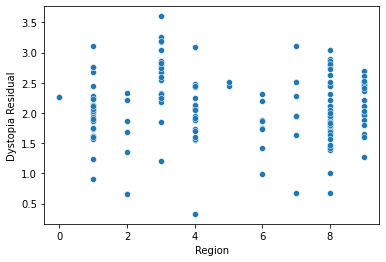

In [18]:
sns.scatterplot(x='Region',y='Dystopia Residual',data=df)

we observe that 1,3,4,8 and 9 Regions are there many people 3rd Region people are very happy.

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

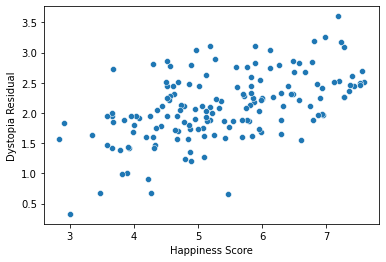

In [19]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=df)

In this scatter plot , we observe that happiness score increases means Dystopia Residual also increase.

<AxesSubplot:xlabel='Standard Error', ylabel='Dystopia Residual'>

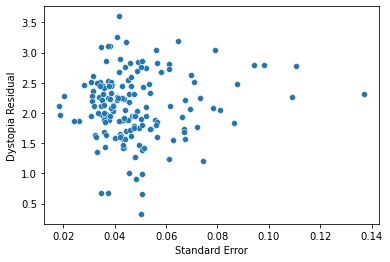

In [43]:
sns.scatterplot(x='Standard Error',y='Dystopia Residual',data=df)

In this scatter plot , we observe that standard error almost points in 0.03 to 0.05 and Dystopia Residual almost 1.5 to 2.5 here.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Dystopia Residual'>

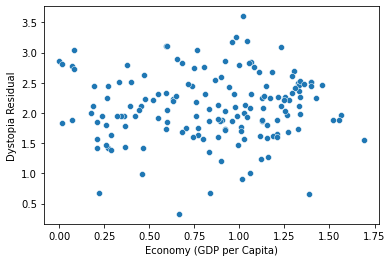

In [44]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Dystopia Residual',data=df)

If the country GDP is good they will happy. 

<AxesSubplot:xlabel='Family', ylabel='Dystopia Residual'>

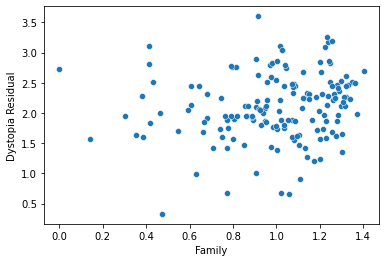

In [45]:
sns.scatterplot(x='Family',y='Dystopia Residual',data=df)

In this we observe that family is high means they very happy , see here family 1.2 to 1.4 all Dystopia Residual points are greater then 1.5.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Dystopia Residual'>

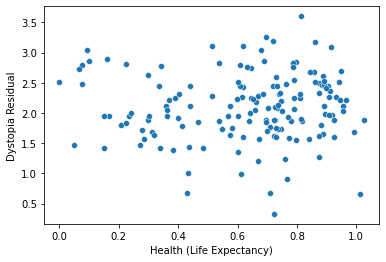

In [47]:
sns.scatterplot(x='Health (Life Expectancy)',y='Dystopia Residual',data=df)

If Health(Life Expectancy) is good means there very happy here

<AxesSubplot:xlabel='Freedom', ylabel='Dystopia Residual'>

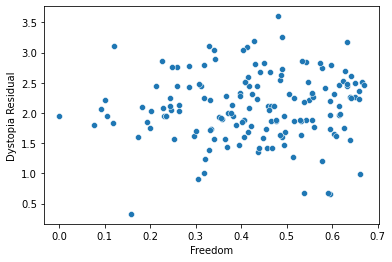

In [48]:
sns.scatterplot(x='Freedom',y='Dystopia Residual',data=df)

If the give freedom to the people they are very here.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Dystopia Residual'>

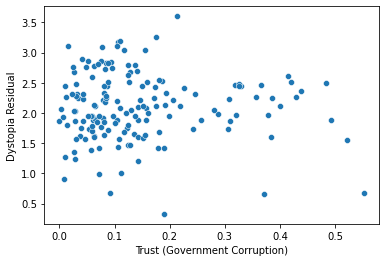

In [49]:
sns.scatterplot(x='Trust (Government Corruption)',y='Dystopia Residual',data=df)

If the corruption is low means they are very happy

###### Checking Outliers of all columns 

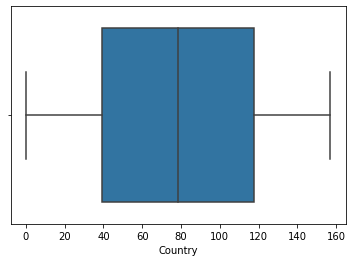

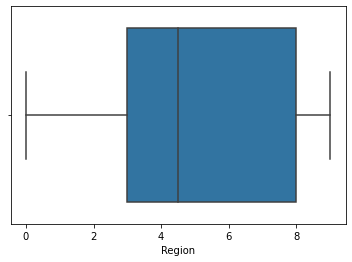

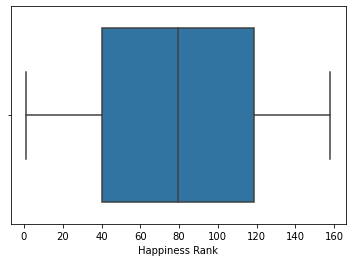

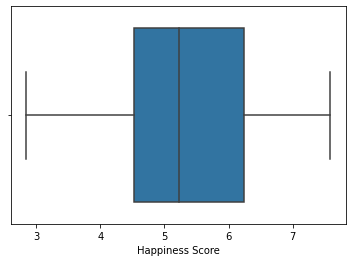

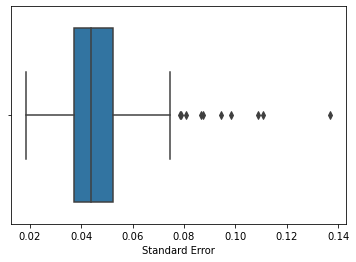

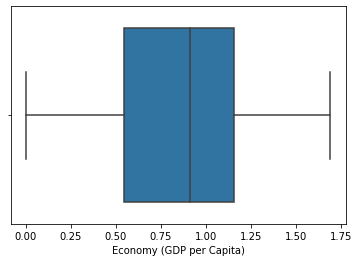

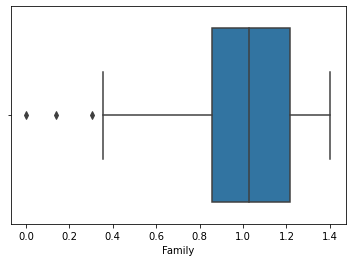

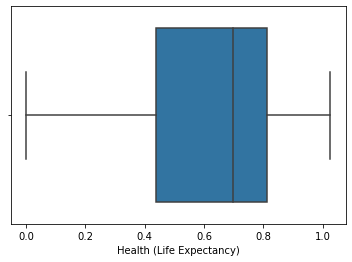

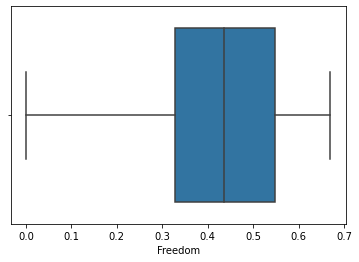

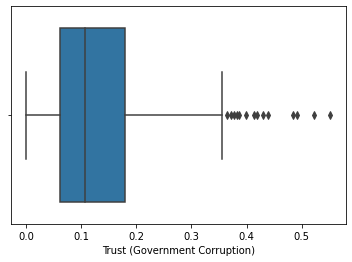

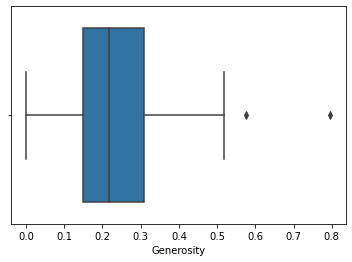

In [20]:
for val in df.columns[0:-1]:
    plt.figure()
    sns.boxplot(df[val])

###### Checking Skewness of all columns

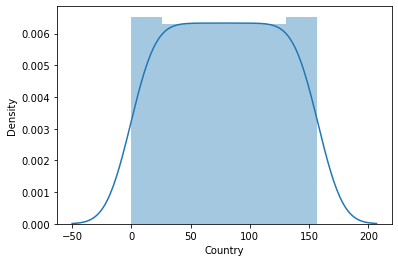

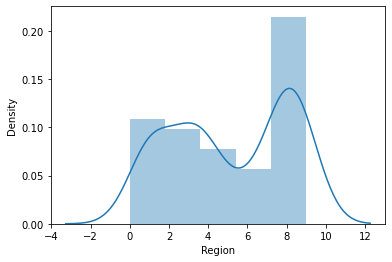

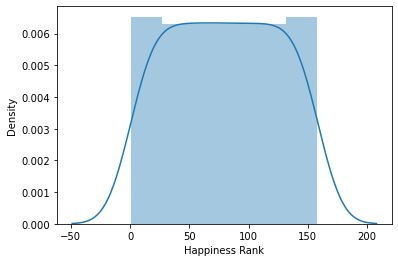

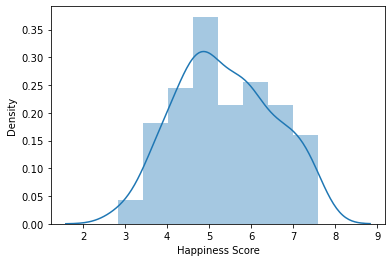

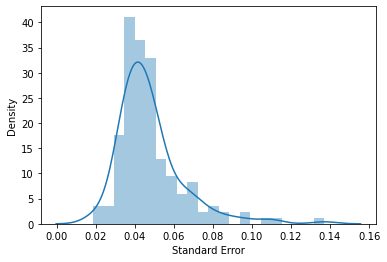

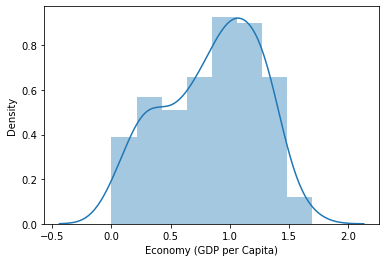

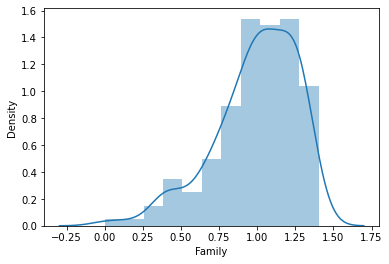

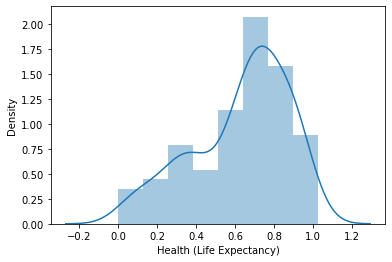

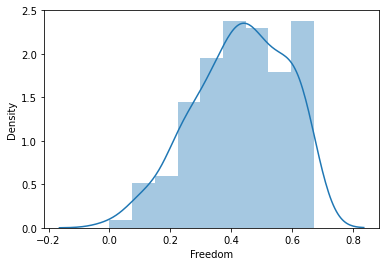

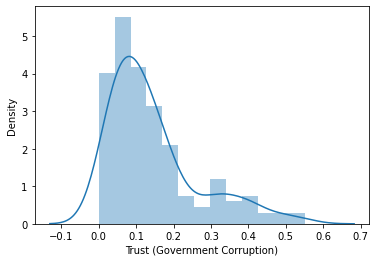

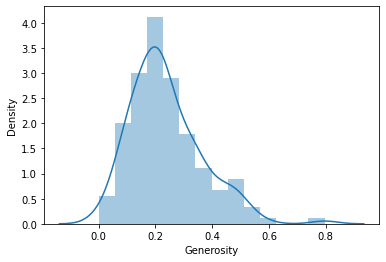

In [21]:
for val in df.columns[:-1]:
    plt.figure()
    sns.distplot(df[val])

###### Drop the Happiness Rank column bcz rank will give based on Dystopia Residual

In [22]:
df.drop('Happiness Rank',axis=1,inplace=True)

checking after droping column

In [23]:
df.shape

(158, 11)

Separate the input columns

In [24]:
x=df.iloc[:,0:-1]

In [25]:
#checking shape
x.shape

(158, 10)

separate the outcome or output column

In [26]:
y=df.iloc[:,-1]

In [27]:
#checking shape here
y.shape

(158,)

Divide x,y for training and testing . 

By using ( train_test_split ) split ,here 22% for testing

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [29]:
#checking shape for x_train
x_train.shape

(123, 10)

In [30]:
#checking shape for x_test
x_test.shape

(35, 10)

In [31]:
#checking shape for y_train
y_train.shape

(123,)

In [32]:
#checking shape for y_test
y_test.shape

(35,)

##### Import some model and fit to the x_train and y_train

check all model scores.  

In [33]:
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

In [34]:
list2=[lnr,dtr,knr,svr]

In [35]:
for val in list2:
    val.fit(x_train,y_train)
    print(val)
    print(val.score(x_train,y_train))
    print('->->->->->->->->->->->->->->')

LinearRegression()
0.9999997628147863
->->->->->->->->->->->->->->
DecisionTreeRegressor()
1.0
->->->->->->->->->->->->->->
KNeighborsRegressor()
0.24432213192935548
->->->->->->->->->->->->->->
SVR()
0.00659330356768939
->->->->->->->->->->->->->->


###### select the more score model

predict the x_test input values

In [36]:
pred=dtr.predict(x_test)

print the all predicted values and Actual values

In [50]:
print('Predicted values:',pred)
print('Actual values:',y_test)

Predicted values: [1.6944  1.93129 1.46494 2.26425 2.08528 1.58782 1.83302 1.86399 2.11569
 2.11569 2.26646 0.99895 1.5714  1.24074 2.44876 2.61955 3.60214 2.48676
 3.19131 2.4657  2.45373 2.20173 3.05137 0.99895 2.74255 1.38079 2.26425
 2.21126 2.24729 2.05125 2.74255 1.95637 2.11569 1.99172 1.88931]
Actual values: 86     2.02500
102    1.57059
150    1.41723
0      2.51738
79     2.00073
67     2.43209
143    1.87877
76     2.23270
19     2.24743
37     2.32323
10     3.08854
129    1.59541
97     1.21305
81     1.87996
108    2.51767
2      2.49204
11     3.17728
114    2.44191
15     3.26001
12     2.53320
80     3.10709
94     1.89894
77     2.89319
135    1.92313
39     2.79094
144    0.98195
1      2.70201
30     2.67782
62     2.09066
113    2.30919
50     2.82334
105    2.11399
17     1.97570
157    1.56726
101    1.80101
Name: Dystopia Residual, dtype: float64


###### Check the mean_absolute_error for predicted values and Actual values.

In [37]:
print(mean_absolute_error(pred,y_test))

0.3025408571428571


###### Check the mean_squared_error for predicted values and Actual values.

In [38]:
print(mean_squared_error(pred,y_test))

0.15154210884285713


###### Check the r2_score for predicted and Acutal values

In [39]:
print(r2_score(pred,y_test))

0.5229234313753899


###### Finally Save the model by using joblib library

save the model by using dump

In [40]:
import joblib

joblib.dump(dtr,'world_happiness_report_dtr.obj')

['world_happiness_report_dtr.obj']

If we want to load the model use 'load' for load model.

In [41]:
load_dtr=joblib.load('world_happiness_report_dtr.obj')

check that loaded model is working are not

In [51]:
load_dtr.predict(x_test)

array([1.6944 , 1.93129, 1.46494, 2.26425, 2.08528, 1.58782, 1.83302,
       1.86399, 2.11569, 2.11569, 2.26646, 0.99895, 1.5714 , 1.24074,
       2.44876, 2.61955, 3.60214, 2.48676, 3.19131, 2.4657 , 2.45373,
       2.20173, 3.05137, 0.99895, 2.74255, 1.38079, 2.26425, 2.21126,
       2.24729, 2.05125, 2.74255, 1.95637, 2.11569, 1.99172, 1.88931])